In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In this problem, you will apply different classification methods. You will use a Rock dataset where you will use 19 different rock features to predict the rock category. The data you need are included in these two files: 1) aggregateRockData.xlsx Download aggregateRockData.xlsx you will only use 2nd column that contains the rock category number (1 = Igneous, 2 = Metamorphic, 3 = Sedimentary) - that will be the label.

So we will obtain only the second column from the excel sheet

##1. Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require?

In [ ]:

# Read the 2nd column from the Excel file and add a header named 'label'
labels_df = pd.read_excel('aggregateRockData-1.xlsx', usecols=[1], nrows=480, header=None, names=['label'])

print(labels_df)
# Display the first few rows of the DataFrame
labels_df.head()


     label
0        1
1        1
2        1
3        1
4        1
..     ...
475      3
476      3
477      3
478      3
479      3

[480 rows x 1 columns]


,label
0,1
1,1
2,1
3,1
4,1


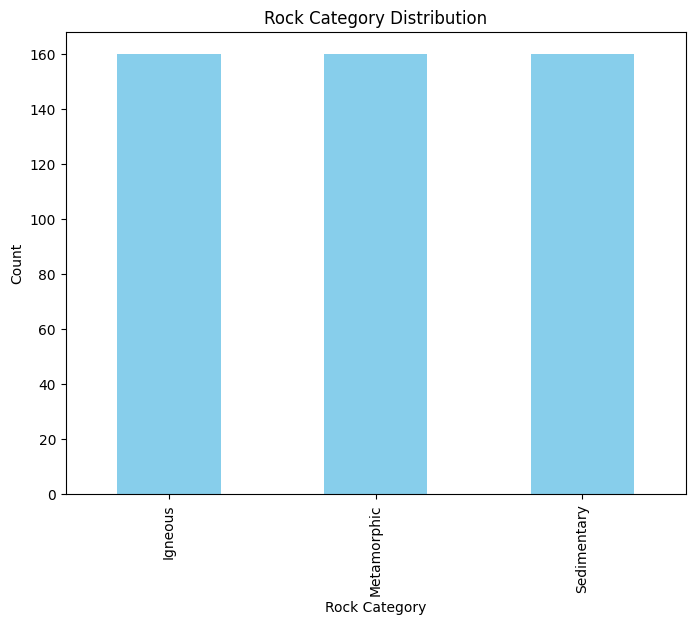

In [ ]:
# Map category numbers to labels
category_labels = {1: 'Igneous', 2: 'Metamorphic', 3: 'Sedimentary'}
labels_df['label'] = labels_df['label'].map(category_labels)
# print(labels_df)

# Count the occurrences of each label
category_counts = labels_df['label'].value_counts()

# Plot the distribution using a bar plot
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Rock Category Distribution')
plt.xlabel('Rock Category')
plt.ylabel('Count')

# Display the chart
plt.show()

By the above plot, we can conclude that there are equal number of category of all types of rocks. (160 of each types)

In [ ]:
# Specify column names
column_names = [f"Feature_{i-2}" for i in range(3, 22)]

# Read the data without a header, using specified column names
features_df = pd.read_csv('norm540.txt', delim_whitespace=True, usecols=range(3, 22), nrows=480, header=None,names=column_names)



# Display the shape of the DataFrame to confirm the number of rows and columns
print("DataFrame shape:", features_df.shape)

# Display the first few rows of the DataFrame
features_df.head()


DataFrame shape: (480, 19)


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19
0,1.690468,-0.159688,-0.646115,-0.252007,-0.609794,0.579927,0.375313,-0.352386,-0.260224,-0.759128,-0.013842,-0.540653,0.946521,-0.227922,-0.225045,-0.116312,0.635812,-0.409247,-0.310419
1,1.690468,-0.159688,-0.530724,0.127922,-0.482150,2.865772,0.375313,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,-0.249084,-0.227922,0.185510,-0.401124,2.042938,-0.409247,-0.034059
2,1.665576,-0.407623,0.858984,-0.631936,-0.443857,2.611790,-0.405184,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,1.245422,-0.227922,-0.225045,-0.401124,1.665865,-0.409247,-0.310419
3,2.233118,-0.407623,-0.415333,-0.424702,-1.120369,0.071962,4.017633,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.116312,2.640737,-0.409247,-0.310419
4,2.213204,-0.159688,1.129901,-0.044773,-1.082076,1.341876,3.757467,-0.352386,-0.260224,-0.759128,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.401124,2.659131,-0.409247,-0.310419


In [ ]:
column_names_new=["Rock number","Subtype number","Token number"]
for i in range(3,22):
  col_nm= "Feature_"+str(i-2)
  column_names_new.append(col_nm)

entireData_df=pd.read_csv('norm540.txt', delim_whitespace=True, nrows=480, header=None,names=column_names_new)

entireData_df.head()


,Rock number,Subtype number,Token number,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,...,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19
0,1,1,1,1.690468,-0.159688,-0.646115,-0.252007,-0.609794,0.579927,0.375313,...,-0.759128,-0.013842,-0.540653,0.946521,-0.227922,-0.225045,-0.116312,0.635812,-0.409247,-0.310419
1,2,1,2,1.690468,-0.159688,-0.530724,0.127922,-0.482150,2.865772,0.375313,...,-0.529150,-0.512160,-0.540653,-0.249084,-0.227922,0.185510,-0.401124,2.042938,-0.409247,-0.034059
2,3,1,3,1.665576,-0.407623,0.858984,-0.631936,-0.443857,2.611790,-0.405184,...,-0.529150,-0.512160,-0.540653,1.245422,-0.227922,-0.225045,-0.401124,1.665865,-0.409247,-0.310419
3,4,1,4,2.233118,-0.407623,-0.415333,-0.424702,-1.120369,0.071962,4.017633,...,-0.529150,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.116312,2.640737,-0.409247,-0.310419
4,5,1,5,2.213204,-0.159688,1.129901,-0.044773,-1.082076,1.341876,3.757467,...,-0.759128,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.401124,2.659131,-0.409247,-0.310419


In [ ]:
# Display statistical values for each attribute
print("Statistical values for each attribute:")
features_df.describe()



Statistical values for each attribute:


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.000794,-0.020638,-0.003114,-0.000448,-0.012741,-0.006879,0.012165,0.002554,-0.001276,0.000504,0.010035,0.000827,-0.001245,0.004763,-0.018912,-0.003262,0.004292,-0.001351,-0.010683
std,1.001943,0.989997,0.994000,0.979588,0.997705,0.985432,1.028424,1.020964,0.985604,0.996473,1.023300,0.995705,1.005633,0.996726,0.920901,0.986196,1.005162,1.006172,0.966634
min,-1.321491,-0.407623,-1.187950,-1.322715,-1.248012,-0.436004,-0.405184,-0.352386,-0.260224,-0.759128,-0.512160,-0.540653,-0.846887,-0.227922,-0.225045,-0.685937,-0.541391,-0.409247,-0.310419
25%,-0.823647,-0.407623,-0.761505,-0.804631,-0.699145,-0.436004,-0.405184,-0.352386,-0.260224,-0.759128,-0.512160,-0.540653,-0.846887,-0.227922,-0.225045,-0.685937,-0.541391,-0.409247,-0.310419
50%,-0.300910,-0.407623,-0.375197,-0.165660,-0.284303,-0.436004,-0.405184,-0.352386,-0.260224,-0.299173,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.401124,-0.541391,-0.409247,-0.310419
75%,0.766966,-0.159688,0.517828,0.576929,0.357107,-0.182021,-0.145018,-0.352386,-0.260224,0.218277,-0.013842,-0.165887,0.348718,-0.227922,-0.225045,0.168500,0.010423,-0.207298,-0.310419
max,2.422299,4.551072,2.750390,4.175892,3.813059,4.643652,4.798130,4.888957,5.862693,3.610446,8.457556,3.207009,4.832237,7.120010,7.986072,5.010309,3.137369,3.629722,5.216791


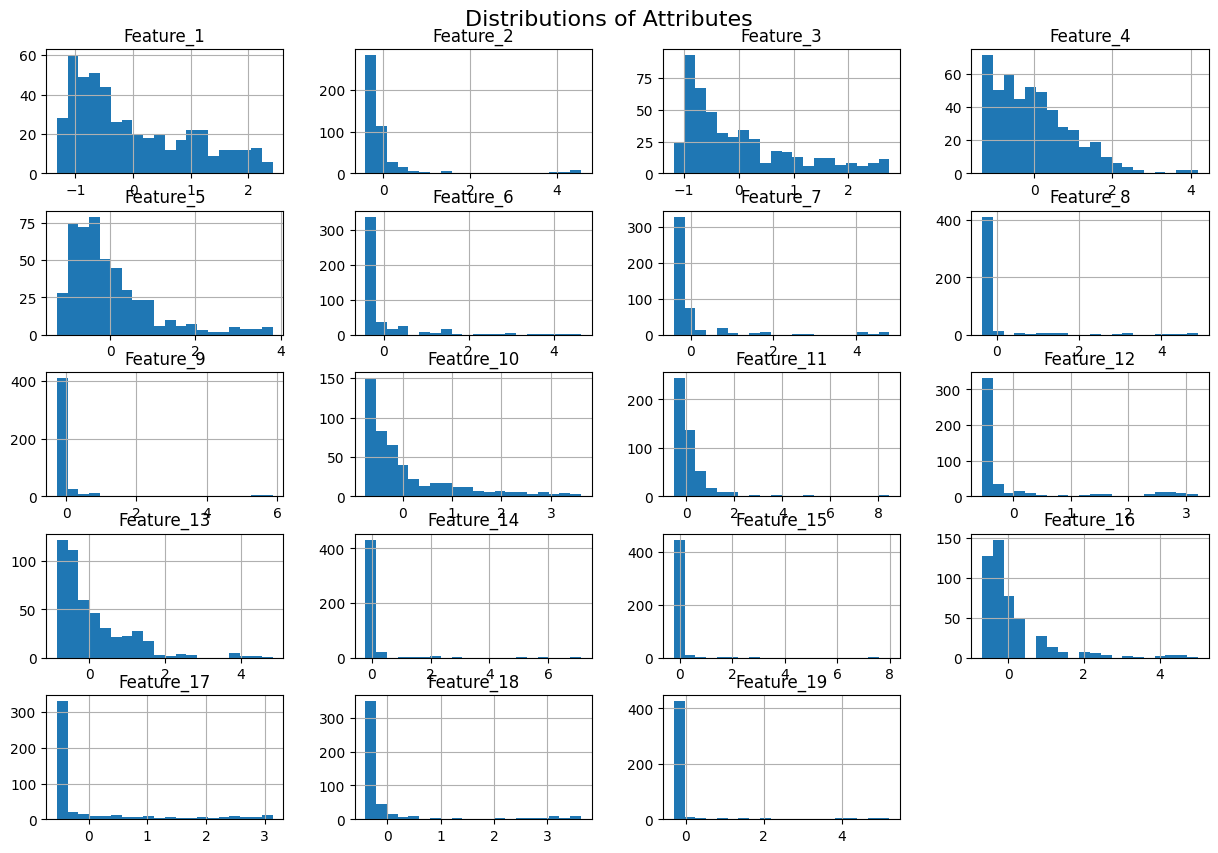

In [ ]:
# Visualize the distributions with histograms
features_df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distributions of Attributes', x=0.5, y=0.92, fontsize=16)
plt.show()

By analysis of histogram, we can observe Feature 1,Feature 3, Feature 4, Feature 5 are clearly right skewed.

We can clearly say features have skewness and as mentioned few features show right skewness clearly and all values are binned.



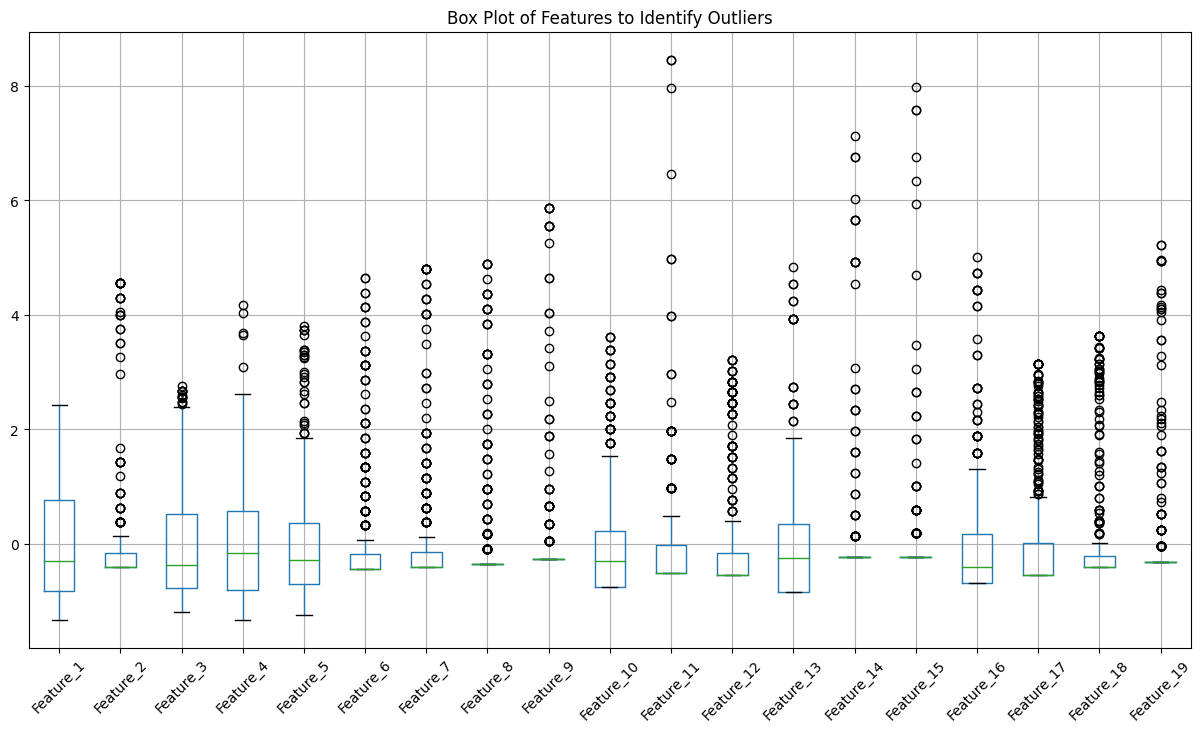

In [ ]:
#special treatment - check for outliers

# Visualize outliers using box plots
plt.figure(figsize=(15, 8))
features_df.boxplot(rot=45)
plt.title('Box Plot of Features to Identify Outliers')
plt.show()


In [ ]:
# Special treatment - Check for missing values
missing_values = features_df.isnull().sum()

# Display the count of missing values for each feature
print("Missing values for each feature:")
print(missing_values)

Missing values for each feature:
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
dtype: int64


Are there any special treatment required?


By the above box plot we are unable to conclude just with box plot evaluation we need to skip any outliers in the dataset.

Even null check is done and there are no significant treatement needed as there are no null values or no conclusive evidence to ignore the outliers.

From the above analysis there are no missing values in the dataset

## 2. Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots. [3 points]

In [ ]:

# Map category numbers to labels
category_labels = {'Igneous': 1, 'Metamorphic': 2, 'Sedimentary': 3}
labels_df['label'] = labels_df['label'].map(category_labels)

# Concatenate labels and features into one DataFrame
df = pd.concat([labels_df, features_df], axis=1)

df.head()

,label,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19
0,1,1.690468,-0.159688,-0.646115,-0.252007,-0.609794,0.579927,0.375313,-0.352386,-0.260224,-0.759128,-0.013842,-0.540653,0.946521,-0.227922,-0.225045,-0.116312,0.635812,-0.409247,-0.310419
1,1,1.690468,-0.159688,-0.530724,0.127922,-0.482150,2.865772,0.375313,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,-0.249084,-0.227922,0.185510,-0.401124,2.042938,-0.409247,-0.034059
2,1,1.665576,-0.407623,0.858984,-0.631936,-0.443857,2.611790,-0.405184,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,1.245422,-0.227922,-0.225045,-0.401124,1.665865,-0.409247,-0.310419
3,1,2.233118,-0.407623,-0.415333,-0.424702,-1.120369,0.071962,4.017633,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.116312,2.640737,-0.409247,-0.310419
4,1,2.213204,-0.159688,1.129901,-0.044773,-1.082076,1.341876,3.757467,-0.352386,-0.260224,-0.759128,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.401124,2.659131,-0.409247,-0.310419


In [ ]:
corr_matrix = df.corr()
corr_matrix["label"].sort_values(ascending=False)

label         1.000000
Feature_10    0.266729
Feature_14    0.258910
Feature_19    0.257632
Feature_11    0.140553
Feature_16    0.139805
Feature_5     0.131839
Feature_15    0.113872
Feature_8     0.077434
Feature_18    0.056010
Feature_7     0.017446
Feature_12    0.008197
Feature_9    -0.017454
Feature_17   -0.058472
Feature_3    -0.095670
Feature_6    -0.122447
Feature_4    -0.151298
Feature_13   -0.229273
Feature_2    -0.283633
Feature_1    -0.297726
Name: label, dtype: float64

1. Feature_10 has the highest positive correlation with the label, suggesting that an increase in 'Feature_10' values is associated with an increase in the label value.
2. Feature_2 and Feature_1 have the highest negative correlations, suggesting that an increase in these features is associated with a decrease in the label value.
3. Features like 'Feature_7', 'Feature_18', 'Feature_8', have weak positive correlations.
4. Feature_12 has the weakest correlation with the label.
4. Features like 'Feature_9', 'Feature_17', 'Feature_3', have weak negative correlations.

<Axes: >

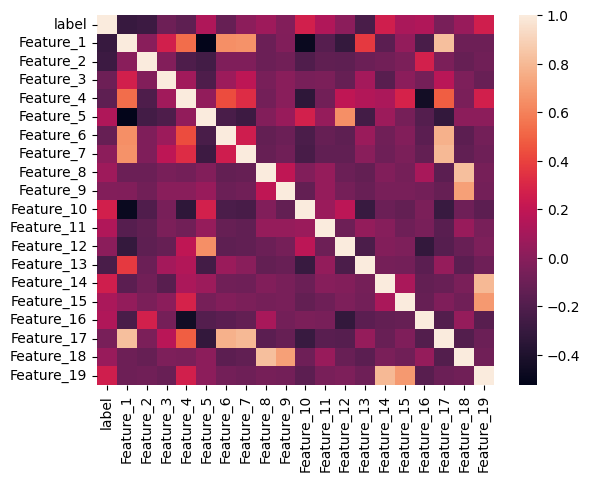

In [ ]:
import seaborn as sns
sns.heatmap(corr_matrix)

In [ ]:
# Extract features (excluding labels) for correlation calculation
features_only_df = df.drop('label', axis=1)

# Calculate the Pearson Correlation Coefficient (PCC) matrix
pcc_matrix = features_only_df.corr()

# Display the PCC matrix
print("Pearson Correlation Coefficient (PCC) matrix:")
print(pcc_matrix)


Pearson Correlation Coefficient (PCC) matrix:
            Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
Feature_1    1.000000   0.003549   0.263305   0.533103  -0.523160   0.648064   
Feature_2    0.003549   1.000000  -0.020159  -0.211600  -0.250928  -0.033963   
Feature_3    0.263305  -0.020159   1.000000   0.089561  -0.207871   0.068070   
Feature_4    0.533103  -0.211600   0.089561   1.000000   0.034763   0.429586   
Feature_5   -0.523160  -0.250928  -0.207871   0.034763   1.000000  -0.230754   
Feature_6    0.648064  -0.033963   0.068070   0.429586  -0.230754   1.000000   
Feature_7    0.655276  -0.029527   0.187408   0.322211  -0.274124   0.250326   
Feature_8   -0.106581  -0.106613  -0.055285  -0.072532  -0.019297  -0.133476   
Feature_9   -0.024270  -0.081185   0.006010   0.002116   0.058716  -0.103118   
Feature_10  -0.486437  -0.202332  -0.057433  -0.338586   0.272158  -0.225366   
Feature_11  -0.181514  -0.147341  -0.043794  -0.080872   0.045363  -0.1239

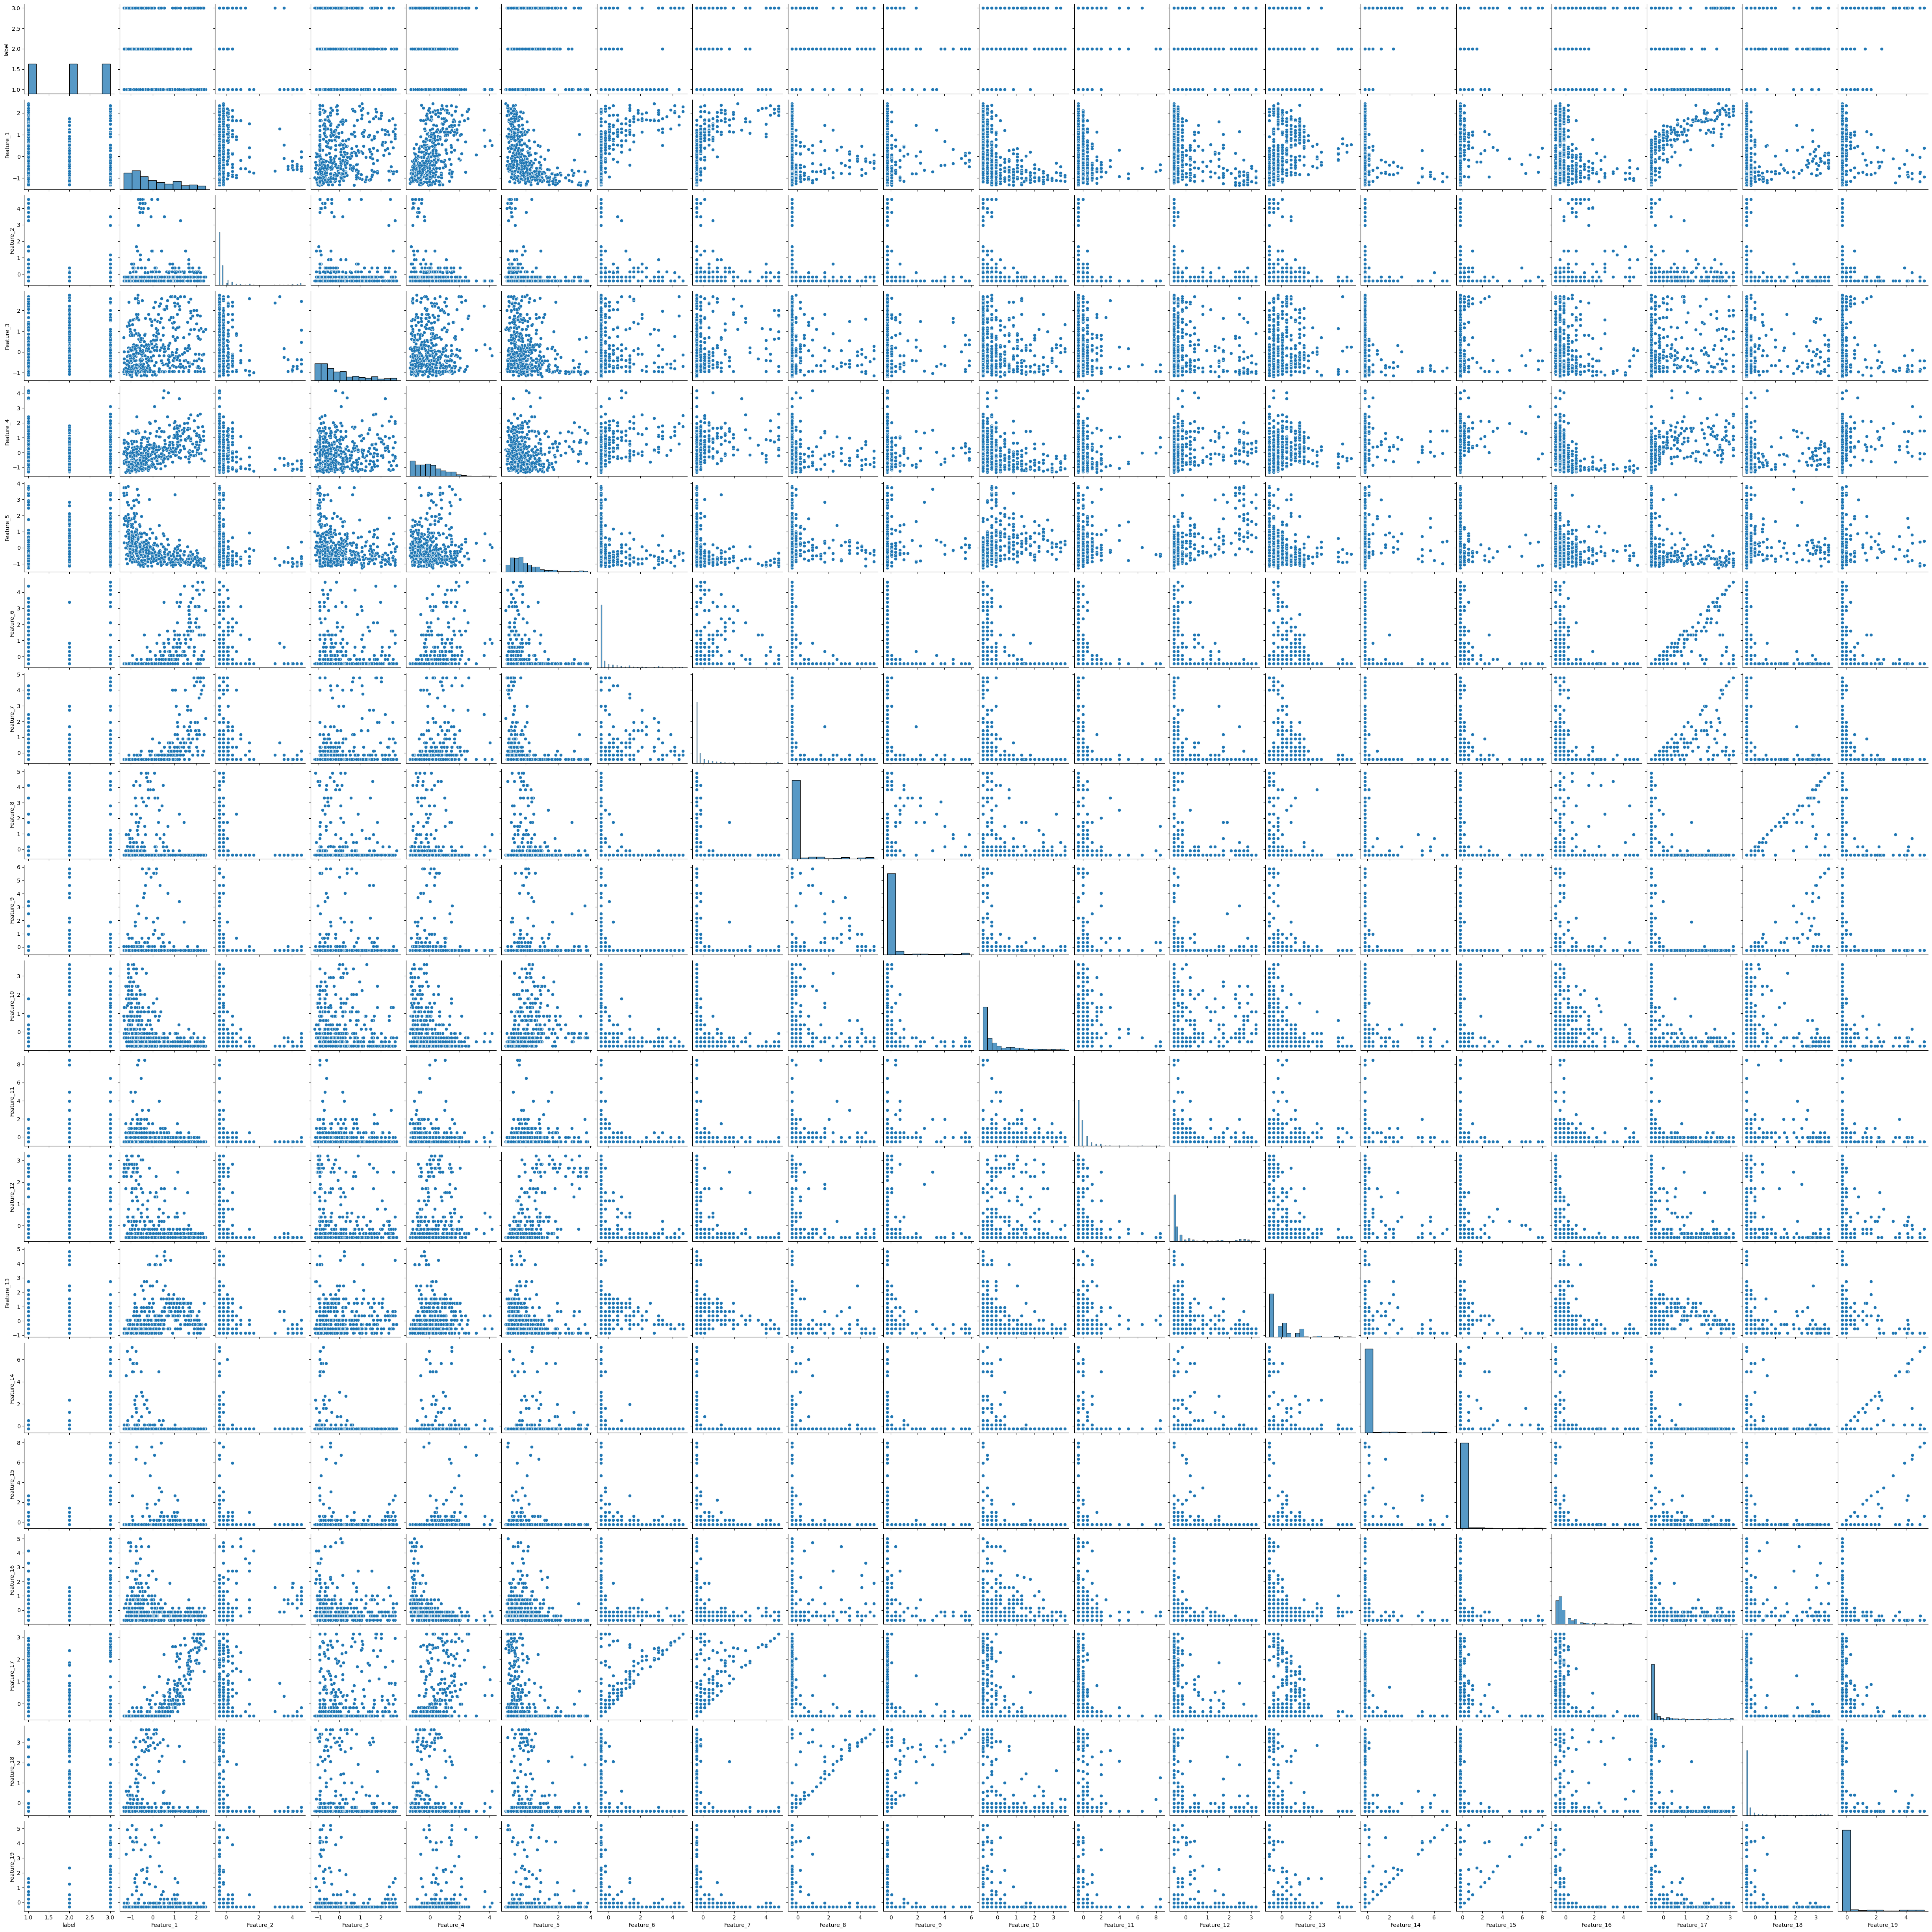

In [ ]:
#Pair Plots - inlcudes both features vs features and features vs label plots
import seaborn as sns
sns.pairplot(data=df)

## 3. For training data, use token numbers 1-10, for validation 11 to 13, and for testing 14 to 16 (each of the 30 rock subtypes has 16 token numbers).

In [ ]:

# Split the data based on the token number

training_data = entireData_df[entireData_df['Token number'].between(1, 10)]
validation_data = entireData_df[entireData_df['Token number'].between(11, 13)]
testing_data = entireData_df[entireData_df['Token number'].between(14, 16)]
training_data=training_data.drop(columns=["Rock number","Subtype number","Token number"],axis=1)
validation_data=validation_data.drop(columns=["Rock number","Subtype number","Token number"],axis=1)
testing_data=testing_data.drop(columns=["Rock number","Subtype number","Token number"],axis=1)


entire_label_new = pd.read_excel('aggregateRockData-1.xlsx', nrows=480, header=None)
training_labels = entire_label_new[entire_label_new[3].between(1, 10)]
validation_labels = entire_label_new[entire_label_new[3].between(11, 13)]
testing_labels = entire_label_new[entire_label_new[3].between(14, 16)]
training_labels=training_labels[training_labels.columns[1]]
validation_labels=validation_labels[validation_labels.columns[1]]
testing_labels=testing_labels[testing_labels.columns[1]]

training_data.shape, validation_data.shape, testing_data.shape, training_labels.shape, validation_labels.shape, testing_labels.shape


((300, 19), (90, 19), (90, 19), (300,), (90,), (90,))

## 4. Train different classifiers and tweak the hyperparameters to improve performance (you can use the grid search if you want or manually try different values). Report training, validation and testing performance (classification accuracy, precision, recall and F1 score) and discuss the impact of the hyperparameters (use markdown cells in Jupyter Notebook to clearly indicate each solution):

## A. Multinomial Logistic Regression (softmax regression); hyperparameters to explore: C, solver, max number of iterations. [10 points]

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [ ]:
# Define the parameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [50, 100, 200, 300]
}

# softmaxreg1 = LogisticRegression(multi_class='multinomial',solver="lbfgs",C=10,max_iter=50)
# softmaxreg1.fit(training_data,training_labels)

softmaxreg=LogisticRegression(multi_class='multinomial')
# Initialize GridSearchCV
grid_search = GridSearchCV(softmaxreg, param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform grid search on the training data
grid_search.fit(training_data, training_labels)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='multinomial'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [50, 100, 200, 300],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=1)

In [ ]:
# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Train the final model using the best parameters
final_model = LogisticRegression(multi_class='multinomial', **best_params)
final_model.fit(training_data, training_labels)

LogisticRegression(C=0.001, max_iter=50, multi_class='multinomial',
                   solver='newton-cg')

###Best params are: C=0.001,max_iter=50, solver='newton-cg'.
### C is the regularization parameter. Makes the model more generalised to unseen data.
###solver is the algorithm to use in optimization problem
###max_iter Specifies maximum number of iterations the solver to converge.

In [ ]:
# Predictions on training set
train_preds = final_model.predict(training_data)
# Predictions on validation set
val_preds = final_model.predict(validation_data)
# Predictions on test set
test_preds = final_model.predict(testing_data)
test_preds

array([1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 3, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3,
       2, 2, 3, 1, 1, 1, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       2, 3])

In [ ]:
# Evaluation metrics
train_accuracy = accuracy_score(training_labels, train_preds)
val_accuracy = accuracy_score(validation_labels, val_preds)
test_accuracy = accuracy_score(testing_labels, test_preds)

train_precision = precision_score(training_labels, train_preds, average='weighted')
val_precision = precision_score(validation_labels, val_preds, average='weighted')
test_precision = precision_score(testing_labels, test_preds, average='weighted')

train_recall = recall_score(training_labels, train_preds, average='weighted')
val_recall = recall_score(validation_labels, val_preds, average='weighted')
test_recall = recall_score(testing_labels, test_preds, average='weighted')

train_f1 = f1_score(training_labels, train_preds, average='weighted')
val_f1 = f1_score(validation_labels, val_preds, average='weighted')
test_f1 = f1_score(testing_labels, test_preds, average='weighted')

In [ ]:
# Display results
print("Best Hyperparameters:", best_params)
print("\nTraining Performance:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1 Score:", train_f1)

print("\nValidation Performance:")
print("Accuracy:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1 Score:", val_f1)

print("\nTesting Performance:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1)

# Classification report for the test set
print("\nClassification Report (Test Set):")
print(classification_report(testing_labels, test_preds))

Best Hyperparameters: {'C': 0.001, 'max_iter': 50, 'solver': 'newton-cg'}

Training Performance:
Accuracy: 0.63
Precision: 0.6334425733402715
Recall: 0.63
F1 Score: 0.621382844748432

Validation Performance:
Accuracy: 0.6333333333333333
Precision: 0.6654411764705882
Recall: 0.6333333333333333
F1 Score: 0.6244177018633541

Testing Performance:
Accuracy: 0.6888888888888889
Precision: 0.7010537095426739
Recall: 0.6888888888888889
F1 Score: 0.6848816029143898

Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.71      0.73      0.72        30
           2       0.63      0.80      0.71        30
           3       0.76      0.53      0.63        30

    accuracy                           0.69        90
   macro avg       0.70      0.69      0.68        90
weighted avg       0.70      0.69      0.68        90



In [ ]:


#Tabular form display
performance_metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Training': [0.63, 0.6334425733402715, 0.63, 0.621382844748432],
    'Validation': [0.6333333333333333, 0.6654411764705882, 0.6333333333333333, 0.6244177018633541],
    'Testing': [0.6888888888888889, 0.7010537095426739, 0.6888888888888889, 0.6848816029143898]
}

# Create a DataFrame from the performance metrics dictionary
performance_df = pd.DataFrame(performance_metrics)
performance_df.set_index('Metric', inplace=True)

# Display the DataFrame
performance_df


,Training,Validation,Testing
Metric,,,
Accuracy,0.630000,0.633333,0.688889
Precision,0.633443,0.665441,0.701054
Recall,0.630000,0.633333,0.688889
F1 Score,0.621383,0.624418,0.684882


# Multinomial Logistic Regression (Softmax Regression) - Hyperparameter Discussion

## **C (Regularization Parameter):**
- The selected `C` value is 0.001, indicating a preference for stronger regularization.
- This suggests a preference for a simpler model with less emphasis on fitting the training data closely.
- The training, validation, and testing performance metrics demonstrate a good balance between bias and variance.

## **Solver:**
- The 'newton-cg' solver was chosen during the grid search.
- 'newton-cg' demonstrated the best performance on the validation set.
- This solver is suitable for multiclass problems, aligning well with the characteristics of the given problem.

## **max_iter:**
- The chosen `max_iter` value is 50, a relatively low number of iterations.
- However, it appears to be sufficient for the optimization algorithm to converge.

## **Training Performance:**
- The model achieves a moderate level of accuracy, precision, recall, and F1 score on the training set.
- The values are reasonably balanced, indicating that the model is learning well from the training data.

## **Validation Performance:**
- Performance on the validation set is consistent with the training set.
- Accuracy, precision, recall, and F1 score are comparable, suggesting good generalization to unseen data.

## **Testing Performance:**
- The model performs well on the test set, achieving an accuracy of 0.689.
- Precision, recall, and F1 score are balanced across the three classes, indicating accurate predictions on new, unseen data.

## **Overall Assessment:**
- The model performs reasonably well with the selected hyperparameters.
- It achieves good accuracy and balanced precision, recall, and F1 scores across the three classes.
- The choice of a low `C` value and 'newton-cg' solver suggests a preference for simplicity and generalization, which aligns well with the provided results.


##4B - Support vector machines (make sure to try using kernels); hyperparameters to explore: C, kernel, degree of polynomial kernel, gamma.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

svm_linear_clf=Pipeline([
    ("scaler",StandardScaler()),
    ("linear_svc",LinearSVC(C=1,loss="hinge"))
])
svm_linear_clf.fit(training_data,training_labels)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [ ]:

from sklearn.svm import SVC



svm_poly_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

param_grid = {
  'svm__C':[5,100,1000,0.001],
  'svm__degree':[3,5,10],
  'svm__kernel':["poly","rbf"],
  'svm__gamma':[5,0.1,10],
  'svm__probability':[True]
}


grid_search = GridSearchCV(svm_poly_clf,param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(training_data,training_labels)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [5, 100, 1000, 0.001],
                         'svm__degree': [3, 5, 10], 'svm__gamma': [5, 0.1, 10],
                         'svm__kernel': ['poly', 'rbf'],
                         'svm__probability': [True]},
             scoring='accuracy', verbose=1)

In [ ]:
# Get the best parameters from the grid search
best_params_svm = grid_search.best_params_
# Train the final model using the best parameters
final_model_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(C=best_params_svm['svm__C'],kernel=best_params_svm['svm__kernel'],gamma=best_params_svm['svm__gamma']))
])
final_model_svm.fit(training_data, training_labels)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=0.001, gamma=0.1))])

##Best params are: kernel=rbf, degree=3, C=0.001, gamma=0.1

kernel:Specifies the kernel type to be used in the algorithm
degree:Degree of the polynomial kernel function (‘poly’). Must be non-negative.
gamma:Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
C: Regularization parameter. The strength of the regularization is inversely proportional to C.

In [ ]:
# Predictions on training set
train_preds_svm = final_model_svm.predict(training_data)
# Predictions on validation set
val_preds_svm= final_model_svm.predict(validation_data)
# Predictions on test set
test_preds_svm = final_model_svm.predict(testing_data)
test_preds_svm

array([1, 1, 3, 1, 1, 3, 1, 1, 1, 2, 1, 2, 1, 1, 1, 3, 3, 3, 2, 3, 3, 2,
       1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [ ]:
#Evaluation of the model
training_accuracy_svm=accuracy_score(training_labels,train_preds_svm)
testing_accuracy_svm=accuracy_score(testing_labels,test_preds_svm)
validation_accuracy_svm=accuracy_score(validation_labels,val_preds_svm)

training_precision_svm=precision_score(training_labels,train_preds_svm,average='weighted')
testing_precision_svm=precision_score(testing_labels,test_preds_svm,average='weighted')
validation_precision_svm=precision_score(validation_labels,val_preds_svm,average='weighted')


training_recall_svm=recall_score(training_labels,train_preds_svm,average='weighted')
testing_recall_svm=recall_score(testing_labels,test_preds_svm,average='weighted')
validation_recall_svm=recall_score(validation_labels,val_preds_svm,average='weighted')


training_f1_svm=f1_score(training_labels,train_preds_svm,average='weighted')
testing_f1_svm=f1_score(testing_labels,test_preds_svm,average='weighted')
validation_f1_svm=f1_score(validation_labels,val_preds_svm,average='weighted')

In [ ]:
#Display results

print("Best Hyperparameters:", best_params_svm)
print("\nTraining Performance:")
print("Accuracy:", training_accuracy_svm)
print("Precision:", training_precision_svm)
print("Recall:", training_recall_svm)
print("F1 Score:", training_f1_svm)

print("\nValidation Performance:")
print("Accuracy:", validation_accuracy_svm)
print("Precision:", validation_precision_svm)
print("Recall:", validation_recall_svm)
print("F1 Score:", validation_f1_svm)

print("\nTesting Performance:")
print("Accuracy:", testing_accuracy_svm)
print("Precision:", testing_precision_svm)
print("Recall:", testing_recall_svm)
print("F1 Score:", testing_f1_svm)

# Classification report for the test set
print("\nClassification Report (Test Set):")
print(classification_report(testing_labels, test_preds_svm))

Best Hyperparameters: {'svm__C': 0.001, 'svm__degree': 3, 'svm__gamma': 0.1, 'svm__kernel': 'rbf', 'svm__probability': True}

Training Performance:
Accuracy: 0.7133333333333334
Precision: 0.7425332541304386
Recall: 0.7133333333333334
F1 Score: 0.7114974294461475

Validation Performance:
Accuracy: 0.6444444444444445
Precision: 0.6745718050065876
Recall: 0.6444444444444445
F1 Score: 0.6438891721910589

Testing Performance:
Accuracy: 0.6555555555555556
Precision: 0.7051020408163265
Recall: 0.6555555555555556
F1 Score: 0.6505931993050384

Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.85      0.57      0.68        30
           2       0.71      0.50      0.59        30
           3       0.55      0.90      0.68        30

    accuracy                           0.66        90
   macro avg       0.71      0.66      0.65        90
weighted avg       0.71      0.66      0.65        90



##4C. Random Forest classifier (also analyze feature importance); hyperparameters to explore: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [18, 30, 35],
    'min_samples_leaf': [10, 20, 15]
}

grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(training_data,training_labels)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [10, 20, 15],
                         'min_samples_split': [18, 30, 35],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
best_params_random_forest = grid_search.best_params_

final_model_random_forest = grid_search.best_estimator_

final_model_random_forest


RandomForestClassifier(max_depth=30, min_samples_leaf=15, min_samples_split=35,
                       n_estimators=10)

max_depth - this parameter specifies the maximum depth of each tree in the Random Forest. The depth of a tree is the longest path from the tree root to a leaf. A deeper tree can model more complex patterns by having more splits, but it also increases the risk of overfitting.
min_samples_leaf - This parameter sets the minimum number of samples a leaf node must have.Setting this parameter helps in controlling overfitting by ensuring that the trees are not too granular.
min_samples_split - This parameter determines the minimum number of samples required to split an internal node. An internal node is any node that precedes a split; it's not a leaf node.
n_estimators - this parameter specifies the number of trees in the forest. Random Forest is an ensemble method that operates by constructing multiple decision trees during training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [ ]:
# Predictions on training set
train_preds_random_forest = final_model_random_forest.predict(training_data)

#  Predictions on validation set
val_preds_random_forest= final_model_random_forest.predict(validation_data)
# Predictions on test set
test_preds_random_forest = final_model_random_forest.predict(testing_data)
test_preds_random_forest



array([1, 1, 1, 3, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 3, 2, 3, 1, 2, 1, 2,
       2, 2, 2, 2, 3, 2, 2, 3, 1, 1, 3, 2, 2, 2, 3, 2, 3, 3, 3, 1, 3, 3,
       2, 3, 3, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 1, 3,
       3, 3])

In [ ]:

##Evaluation of Metrics
train_accuracy_random_forest = accuracy_score(training_labels, train_preds_random_forest)
val_accuracy_random_forest= accuracy_score(validation_labels, val_preds_random_forest)
test_accuracy_random_forest = accuracy_score(testing_labels, test_preds_random_forest)

train_precision_random_forest = precision_score(training_labels, train_preds_random_forest, average='weighted')
val_precision_random_forest = precision_score(validation_labels, val_preds_random_forest, average='weighted')
test_precision_random_forest = precision_score(testing_labels, test_preds_random_forest, average='weighted')

train_recall_random_forest = recall_score(training_labels, train_preds_random_forest, average='weighted')
val_recall_random_forest = recall_score(validation_labels, val_preds_random_forest, average='weighted')
test_recall_random_forest = recall_score(testing_labels, test_preds_random_forest, average='weighted')

train_f1_random_forest = f1_score(training_labels, train_preds_random_forest, average='weighted')
val_f1_random_forest = f1_score(validation_labels, val_preds_random_forest, average='weighted')
test_f1_random_forest = f1_score(testing_labels, test_preds_random_forest, average='weighted')




print("Best Hyperparameters:", best_params_random_forest)
print("\nTraining Performance:")
print("Accuracy:", train_accuracy_random_forest)
print("Precision:", train_precision_random_forest)
print("Recall:", train_recall_random_forest)
print("F1 Score:", train_f1_random_forest)

print("\nValidation Performance:")
print("Accuracy:", val_accuracy_random_forest)
print("Precision:", val_precision_random_forest)
print("Recall:", val_recall_random_forest)
print("F1 Score:", val_f1_random_forest)

print("\nTesting Performance:")
print("Accuracy:", test_accuracy_random_forest)
print("Precision:", test_precision_random_forest)
print("Recall:", test_recall_random_forest)
print("F1 Score:", test_f1_random_forest)


Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 15, 'min_samples_split': 35, 'n_estimators': 10}

Training Performance:
Accuracy: 0.7466666666666667
Precision: 0.7526514107159269
Recall: 0.7466666666666667
F1 Score: 0.747111971806501

Validation Performance:
Accuracy: 0.6555555555555556
Precision: 0.6503478810879191
Recall: 0.6555555555555556
F1 Score: 0.6503974167908594

Testing Performance:
Accuracy: 0.5777777777777777
Precision: 0.6108597285067873
Recall: 0.5777777777777777
F1 Score: 0.5747957138452051


In [ ]:
feature_importance=final_model_random_forest.feature_importances_
feature_importance

array([0.16594905, 0.04627024, 0.07129266, 0.04835717, 0.19954635,
       0.06131558, 0.00161253, 0.02772055, 0.02098555, 0.04477784,
       0.00427154, 0.03848163, 0.06933945, 0.01711855, 0.        ,
       0.0226658 , 0.09942478, 0.02268799, 0.03818275])

Feature 5 reduces maximum impurity on an average(across all trees in the forest).
Feature 15 reduces the least impurity on an average.

##5. Combine your classifiers into an ensemble and try to outperform each individual classifier on the validation set. Once you have found a good one, try it on the test set. Describe and discuss your findings. [8 points]

In [ ]:
from sklearn.ensemble import VotingClassifier
models=[[('LogisticRegression',final_model),('SVM',final_model_svm),('RandomForest',final_model_random_forest)],
        [('LogisticRegression',final_model),('SVM',final_model_svm)],
        [('SVM',final_model_svm),('RandomForest',final_model_random_forest)],
        [('LogisticRegression',final_model),('RandomForest',final_model_random_forest)]]
accuracy=[]
recall=[]
precision=[]
for model in models:
  voting_clf=VotingClassifier(
      estimators=model,
      voting='hard'
  )
  voting_clf.fit(training_data,training_labels)
  validation_preds_ensemble=voting_clf.predict(validation_data)
  accuracy.append(accuracy_score(validation_labels,validation_preds_ensemble))
  recall.append(recall_score(validation_labels,validation_preds_ensemble,average='weighted'))
  precision.append(precision_score(validation_labels,validation_preds_ensemble,average='weighted'))

print("accuracy:",accuracy)
print("recall:",recall)
print("precision:",precision)
best_accuracy= max(max(accuracy),validation_accuracy_svm,val_accuracy,val_accuracy_random_forest)
print("Best accuracy:",best_accuracy)

accuracy: [0.6222222222222222, 0.6333333333333333, 0.6444444444444445, 0.5777777777777777]
recall: [0.6222222222222222, 0.6333333333333333, 0.6444444444444445, 0.5777777777777777]
precision: [0.6207827260458839, 0.6654411764705882, 0.6581354081354082, 0.6331923890063424]
Best accuracy: 0.6555555555555556


It could be noted that the best accuracy is obtained for the ensemble having the  logistic regression final classifier, svm final classifier and random forest final classifier. Hence, using accuracy as the performance metrics we are concluding that an ensemble of all three final classifier is the best one.

In [ ]:

final_voting_clf=VotingClassifier(
    estimators=models[0],
    voting='hard'
)
final_voting_clf.fit(training_data,training_labels)
train_preds=final_voting_clf.predict(training_data)
validation_preds=final_voting_clf.predict(validation_data)
test_preds=final_voting_clf.predict(testing_data)
print(test_preds)

best_train_accuracy=accuracy_score(training_labels,train_preds)
best_test_accuracy=accuracy_score(testing_labels,test_preds)
best_validation_accuracy=accuracy_score(validation_labels,validation_preds)


best_train_recall=recall_score(training_labels,train_preds,average='weighted')
best_test_recall=recall_score(testing_labels,test_preds,average='weighted')
best_validation_recall=recall_score(validation_labels,validation_preds,average='weighted')


best_train_precision=precision_score(training_labels,train_preds,average='weighted')
best_test_precision=precision_score(testing_labels,test_preds,average='weighted')
best_validation_precision=precision_score(validation_labels,validation_preds,average='weighted')


best_train_f1=f1_score(training_labels,train_preds,average='weighted')
best_test_f1=f1_score(testing_labels,test_preds,average='weighted')
best_validation_f1=f1_score(validation_labels,validation_preds,average='weighted')



print("\nTraining Performance:")
print("Accuracy:", best_train_accuracy)
print("Precision:", best_train_precision)
print("Recall:", best_train_recall)
print("F1 Score:", best_train_f1)

print("\nValidation Performance:")
print("Accuracy:", best_validation_accuracy)
print("Precision:", best_validation_precision)
print("Recall:", best_validation_recall)
print("F1 Score:", best_validation_f1)

print("\nTesting Performance:")
print("Accuracy:", best_test_accuracy)
print("Precision:", best_test_precision)
print("Recall:", best_test_recall)
print("F1 Score:", best_test_f1)


[1 1 1 1 1 3 1 1 1 2 1 2 1 1 1 3 3 3 2 1 3 2 1 1 1 1 1 1 1 1 1 3 1 2 2 2 1
 3 1 3 3 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 3 3 3 3 3 3 1 3 1 3 3 2 1 1 1 1 3
 1 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3]

Training Performance:
Accuracy: 0.7033333333333334
Precision: 0.7034136223738793
Recall: 0.7033333333333334
F1 Score: 0.7029529910252561

Validation Performance:
Accuracy: 0.6555555555555556
Precision: 0.6578282828282828
Recall: 0.6555555555555556
F1 Score: 0.649785698172795

Testing Performance:
Accuracy: 0.6666666666666666
Precision: 0.6742424242424243
Recall: 0.6666666666666666
F1 Score: 0.6666666666666666


##6. Is your method better than a human? Test that by taking human data from trialData.csv Download trialData.csv(see hereLinks to an external site. for a description of the file). Compute human accuracy on train and test data (use only rocks with numbers 1 to 480 and note that Block number 1-3 is training, number 4 is test). How does it compare to the accuracy of your best model? [2 points] Then, compute the average human accuracy for each of the 480 rocks and the standard deviation of accuracy for each of the 480 rocks (regardless of whether they are train or test rocks). Make a plot with the x-axis showing rock numbers (1 to 480) and the y-axis showing average human accuracy (values between 0 and 1) and standard deviation for each of 480 rocks. [2 points] Then, add the accuracy of your model for each of those rocks (1 for correct classification and 0 for incorrect classification) on the same plot (in a different color). What do you observe - is your model making similar errors as humans? [1 point]

In [77]:
human_data = pd.read_csv('trialData.csv')
data_filtered = human_data[human_data['rocknumber'].between(1, 480)]
train_data = data_filtered[data_filtered['block'].isin([1, 2, 3])]
test_data = data_filtered[data_filtered['block'] == 4]

train_accuracy = train_data['cat_correct'].mean()
test_accuracy = test_data['cat_correct'].mean()

print(f"Human Accuracy on Training Data: {train_accuracy}")
print(f"Human Accuracy on Testing Data: {test_accuracy}")


Human Accuracy on Training Data: 0.5599349490660221
Human Accuracy on Testing Data: 0.5984143924378716


####The human accuracy seems to be lesser than the model accuracy

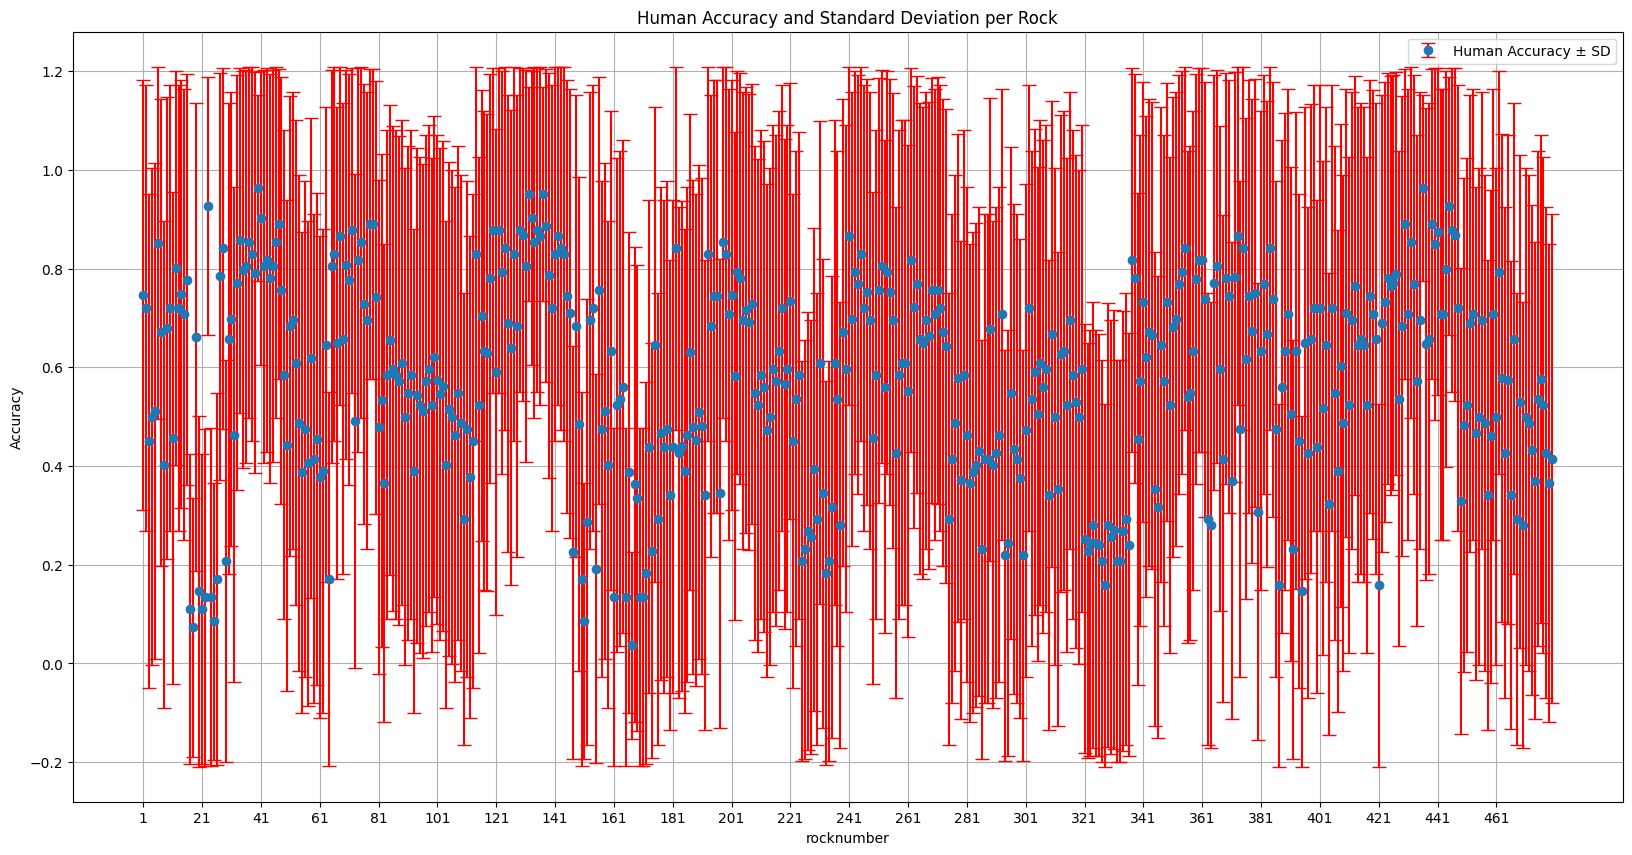

                mean       std
rocknumber                    
1           0.746951  0.435423
2           0.719512  0.452002
3           0.451220  0.500677
4           0.500000  0.503077
5           0.512195  0.502927
...              ...       ...
476         0.576220  0.494911
477         0.524390  0.502478
478         0.426829  0.497661
479         0.365854  0.484633
480         0.414634  0.495691

[480 rows x 2 columns]


In [79]:
import matplotlib.pyplot as plt


accuracy_per_rock = data_filtered.groupby('rocknumber')['cat_correct'].agg(['mean', 'std'])
# accuracy_per_rock['mean']
# Plotting
plt.figure(figsize=(20, 10))
plt.errorbar(accuracy_per_rock.index, accuracy_per_rock['mean'], yerr=accuracy_per_rock['std'], fmt='o', ecolor='r', capsize=5, label='Human Accuracy ± SD')
plt.xticks(np.arange(1, 481,20))
plt.xlabel('rocknumber')
plt.ylabel('Accuracy')
plt.title('Human Accuracy and Standard Deviation per Rock')
plt.legend()
plt.grid(True)
plt.show()

print(accuracy_per_rock)


In [80]:
data_predict=entireData_df.drop(columns=["Rock number","Subtype number","Token number"],axis=1)
preds=final_voting_clf.predict(data_predict)

human_data2 = pd.read_csv('trialData.csv')
data_filtered2 = human_data2[human_data2['rocknumber'].between(1, 480)]

entire_label=entire_label_new[entire_label_new.columns[1]]
correct_pred_model=[]
for i in range(0,480):
  if preds[i]==entire_label[i]:
    correct_pred_model.append(1)
  else:
    correct_pred_model.append(0)



def calculate_new_value(row):

    return correct_pred_model[row['rocknumber']-1]

# Use the apply function to create a new column based on the existing column
data_filtered2['model_pred_correct'] = data_filtered2.apply(calculate_new_value, axis=1)
train_data_model = data_filtered2[data_filtered2['block'].isin([1, 2, 3])]
test_data_model = data_filtered2[data_filtered2['block'] == 4]

train_accuracy_model = train_data_model['model_pred_correct'].mean()
test_accuracy_model = test_data_model['model_pred_correct'].mean()

print("Model train accuracy:",train_accuracy_model)
print("Model test accuracy:",test_accuracy_model)

Model train accuracy: 0.6944638944729293
Model test accuracy: 0.6874523555420033


###Yes. By these measurements we can say that using accuracy as performance matrix our best fit model (ensemble of the three classifier) produces better predictions than humans.

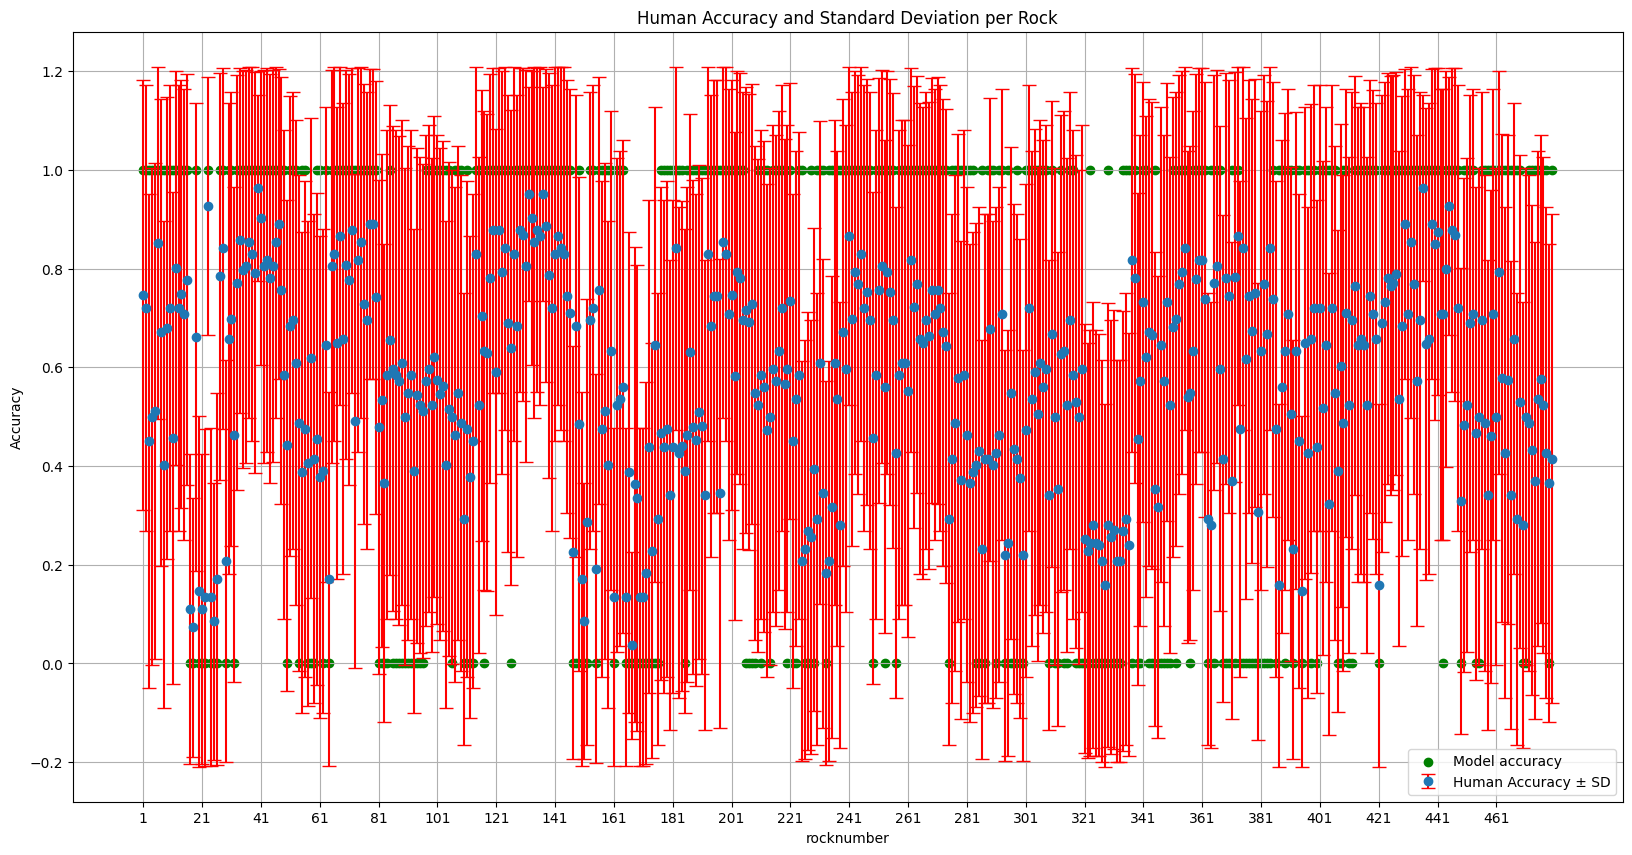

                mean       std
rocknumber                    
1           0.746951  0.435423
2           0.719512  0.452002
3           0.451220  0.500677
4           0.500000  0.503077
5           0.512195  0.502927
...              ...       ...
476         0.576220  0.494911
477         0.524390  0.502478
478         0.426829  0.497661
479         0.365854  0.484633
480         0.414634  0.495691

[480 rows x 2 columns]


In [81]:
accuracy_per_rock_model = data_filtered2.groupby('rocknumber')['model_pred_correct'].agg(['mean'])
accuracy_per_rock_model
# Plotting
plt.figure(figsize=(20, 10))
plt.errorbar(accuracy_per_rock.index, accuracy_per_rock['mean'], yerr=accuracy_per_rock['std'], fmt='o', ecolor='r', capsize=5, label='Human Accuracy ± SD')
plt.scatter(accuracy_per_rock.index,accuracy_per_rock_model['mean'],color='green',label='Model accuracy')
plt.xticks(np.arange(1, 481,20))
plt.xlabel('rocknumber')
plt.ylabel('Accuracy')
plt.title('Human Accuracy and Standard Deviation per Rock')
plt.legend()
plt.grid(True)

plt.show()

print(accuracy_per_rock)

### The prediction of our model was obtained for just 480 instnaces with rocknumbers ranging from 1 to 480 only was obtained. But the data collected for human prediction comprised multiple rock instances of the same rock number. On observing the norms.txt dataset we can say that frequency of right prediction of a particular type, subtype of the rock is given and then the models accuracy is computed. So, indirectly we are testing the model for set of rock instances of same rock number (same type and subtype).
### Using this approach we added a new column to trail_data.csv conataining model prediction. Where the value for all instanbces of a particular rock number is either a 0 or a 1 based on it's prediction made previously on the norms.txt dataset (for one instance of a particular rock number).
### We can see from the plot that the model prediction is 1 when the human average prediction score is high and also the model's prediction complies with human prediction when the average is low.

##REFERENCES:


* Scikit Learn article: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
* Scikit Learn article: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* Velocity Business Solution article: https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/
* Scikit Learn article: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
* Towards Data Science article: https://towardsdatascience.com/ensemble-learning-using-scikit-learn-85c4531ff86a
* OpenAI's ChatGPT model was employed for certain conversational AI tasks